In [2]:
import os
import sys
import itertools
import uproot
import ROOT
import numpy  as np
import pandas as pd
import tables as tb
import matplotlib.pyplot as plt

from os.path import expandvars

sys.path.append(expandvars("$HOME/HK_Software/WCSimFQTuningTools/STable/"))
from STable_tools import read_stable, split_tubeids, read_wcsim_geometry
ROOT.gROOT.LoadMacro(expandvars("$HOME/HK_Software/fiTQun/install-Darwin_arm64-gcc_15.0.0-python_3.10.13/lib/libfiTQunLib.dylib"))

Welcome to JupyROOT 6.28/11


0

In [3]:
fname_root = "/Users/gdiazlop/HK_Software/tuning_data/Gonzalo/STable/fiTQun_scattablesF_nuPRISMBeamTest_16cShort_mPMT.root"
fname_root = "/Users/gdiazlop/HK_Software/WCSimFQTuningTools/STable/scattables.root"
fname_hdf  = "/Users/gdiazlop/HK_Software/WCSimFQTuningTools/STable/scattables.h5"

In [4]:
tables_root = read_stable(fname_root)

In [9]:
tabname = "side"
with tb.open_file(fname_hdf) as f:
    # read bins
    bins = 6*[None]
    for i in range(5): bins[i] = getattr(f.root.bins, f"bins_{i}").read()
    zPMTbins = f.root.bins.bins_zPMT.read()
    RPMTbins = f.root.bins.bins_RPMT.read()
    if tabname == "side": bins[5] = zPMTbins
    else                : bins[5] = RPMTbins
    # read table
    stable = getattr(f.root.tables, tabname + "/stable").read()

stable = np.moveaxis(stable, 5, 2)

bins_hdf = 6*[None]
bins_hdf[0:2] = bins[0:2]
bins_hdf[2]   = bins[-1]
bins_hdf[3:]  = bins[2:5]

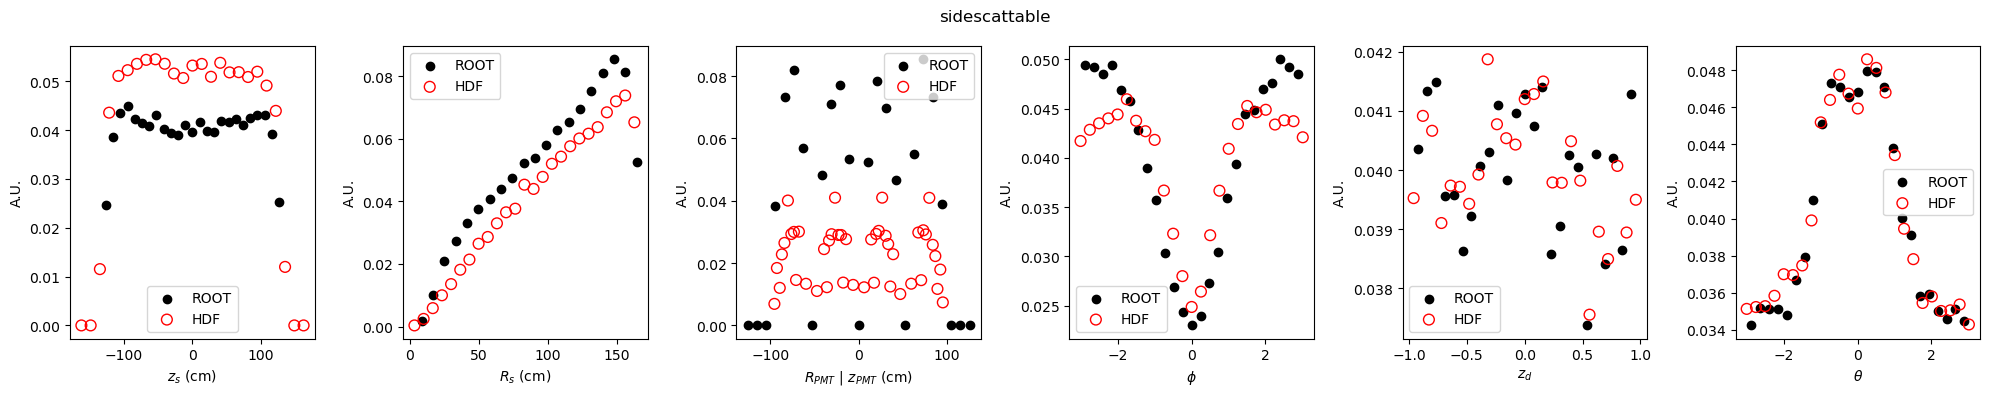

In [10]:
vars = {0:r"$z_s$ (cm)", 1:r"$R_s$ (cm)", 2:r"$R_{PMT} ~|~ z_{PMT}$ (cm)", 3:r"$\phi$", 4:r"$z_d$", 5:r"$\theta$"}

name = "sidescattable"
bins_root = tables_root[f"{name}_bins"]
tab       = tables_root[name]

plt.figure(figsize=[20, 4])
plt.suptitle(name)
dims = list(range(6))
for dim in dims:

    plt.subplot(1, 6, dim+1)
    # old
    nbins  = bins_root[0][dim]
    bounds = bins_root[1][dim]
    dx = (bounds[-1] - bounds[0])/nbins
    x = np.linspace(bounds[0]+dx, bounds[-1]-dx, nbins)
    proj = tab.sum(axis=tuple(np.delete(dims, dim)))
    plt.scatter(x, proj/np.sum(proj), color="k", label="ROOT")

    # new
    b = bins_hdf[dim]
    x = (b[1:] + b[:-1])/2.
    proj = stable.sum(axis=tuple(np.delete(dims, dim)))
    plt.scatter(x, proj/np.sum(proj), label="HDF", edgecolor="red", s=60, c="none")

    plt.xlabel(vars[dim])
    plt.ylabel("A.U.")
    plt.legend()
    plt.tight_layout()

In [ ]:
f.cre